In [1]:
import numpy as np 
import math
import pandas as pd 

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from numpy.polynomial.polynomial import polyfit

In [2]:
data = pd.read_csv("../knn/train", names=["gender", "height", "weight"])

In [3]:
data

,gender,height,weight
5640,Female,66.766157,152.944405
8220,Female,63.881197,137.170886
2415,Male,68.720243,182.455923
7442,Female,62.834020,132.169244
3182,Male,70.962617,195.017206
...,...,...,...
2866,Male,68.932069,187.626609
4579,Male,64.746174,176.948433
4056,Male,69.741240,206.636440
7843,Female,62.536789,128.357712


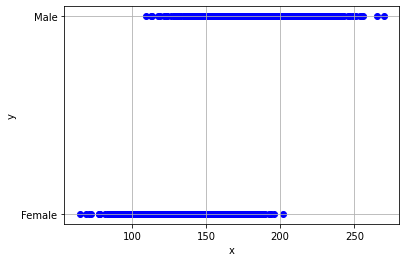

In [4]:
%matplotlib inline 
plt.scatter(data['weight'], data['gender'], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

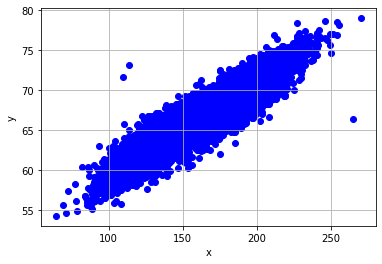

In [5]:
%matplotlib inline 
plt.scatter(data['weight'], data['height'], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

In [6]:
x = data['weight']
y = data['height']

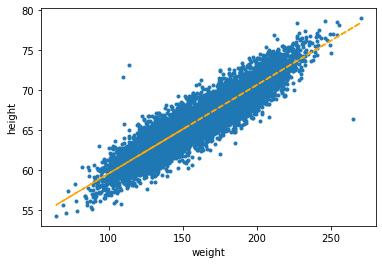

In [7]:
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '--', color='orange')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

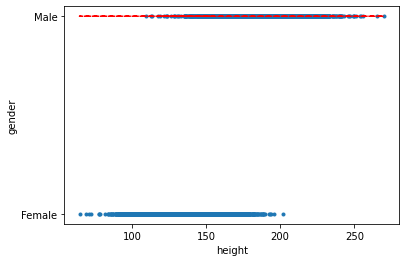

In [8]:
z = 1/1 + (np.exp(-(b+m*x)) ) 
plt.plot(x, data['gender'], '.')
plt.plot(x, z, '--', color='r')
plt.xlabel('height')
plt.ylabel('gender')
plt.show()

In [9]:
data = pd.get_dummies(data, columns=['gender'])

In [10]:
y = data['gender_Female']

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

In [13]:
x = x.values.reshape(-1,1)
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
model.predict_proba(x)

array([[0.25318447, 0.74681553],
       [0.03863382, 0.96136618],
       [0.94824832, 0.05175168],
       ...,
       [0.99792824, 0.00207176],
       [0.01205986, 0.98794014],
       [0.0039324 , 0.9960676 ]])

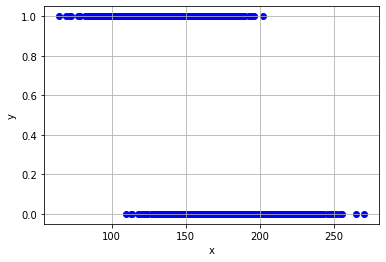

In [15]:
%matplotlib inline 
plt.scatter(x, y, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

In [16]:
model.predict_proba(x)[:,1]

array([0.74681553, 0.96136618, 0.05175168, ..., 0.00207176, 0.98794014,
       0.9960676 ])

In [17]:
data["prediction"] = model.predict_proba(x)[:,1]

In [18]:
data

,height,weight,gender_Female,gender_Male,prediction
5640,66.766157,152.944405,1,0,0.746816
8220,63.881197,137.170886,1,0,0.961366
2415,68.720243,182.455923,0,1,0.051752
7442,62.834020,132.169244,1,0,0.979973
3182,70.962617,195.017206,0,1,0.009889
...,...,...,...,...,...
2866,68.932069,187.626609,0,1,0.026411
4579,64.746174,176.948433,0,1,0.103070
4056,69.741240,206.636440,0,1,0.002072
7843,62.536789,128.357712,1,0,0.987940


In [19]:
x = data["weight"]

In [20]:
y = data["gender_Female"]

In [21]:
pred = data["prediction"]

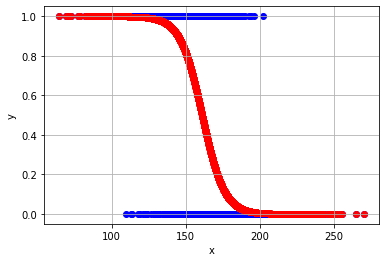

In [22]:
%matplotlib inline 
plt.scatter(x, y, color='b')
plt.scatter(x, pred, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();